In [2]:
import numpy as np
import matplotlib.pyplot as plt     
import seaborn as sns

In [3]:
X=np.array([1,2,3,4,5,7])
Y=np.array([0,1,0,0,1,1])


w=2
b=1

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [12]:
def predict_y(X, w, b):
    m = Y.shape[0]
    y_probs = np.zeros(m)
    for i in range(m):
        y_probs[i] = sigmoid(w * X[i] + b)
    y_preds = np.where(y_probs >= 0.5, 1, 0)
    return y_probs, y_preds

In [13]:
y_probs, y_preds = predict_y(X, w, b)
y_probs, y_preds

(array([0.95257413, 0.99330715, 0.99908895, 0.99987661, 0.9999833 ,
        0.99999969]),
 array([1, 1, 1, 1, 1, 1]))

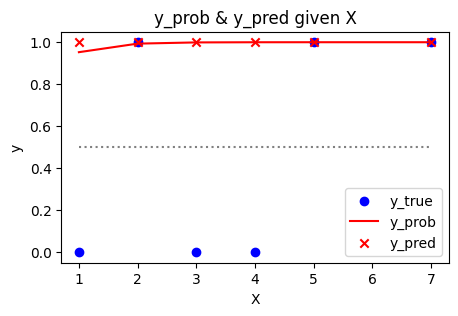

In [15]:
plt.figure(figsize=(5,3))
plt.scatter(X, Y, color='b', label='y_true')
plt.plot(X, y_probs, color='r', label='y_prob')
plt.scatter(X, y_preds, color='r', marker='x', label='y_pred')
plt.plot([X.min(), X.max()], [0.5]*2, linestyle='dotted', color='grey')
plt.xlabel('X')
plt.ylabel('y')
plt.title('y_prob & y_pred given X')
plt.legend()

In [16]:
def calc_cost(X, Y, w, b, elipson=1e-5):
    m = X.shape[0]

    cost = 0.

    for i in range(m):
        z = w * X[i] + b
        f_wb = sigmoid(z)
        cost += -Y[i] * np.log(f_wb + elipson) - (1 - Y[i]) * np.log(1 - f_wb + elipson)

    cost /= m
    return cost

In [18]:
calc_cost(X, Y, w, b)


3.1612121382754594

In [21]:
calc_cost(X, Y, w-2, b)


0.8132362571042838

In [28]:
calc_cost(X, Y, w-2, b-1)


0.6931271807599427

In [33]:
def calc_gradient(X, Y, w, b):
    m = X.shape[0]

    dj_dw = 0.
    dj_db = 0.

    for i in range(m):
        z = w * X[i] + b
        f_wb = sigmoid(z)
        err = f_wb - Y[i]
        dj_dw += err * X[i]
        dj_db += err

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [34]:
print(f"initial w: {w}, initial b: {b}, initial_cost: {calc_cost(X, Y, w, b)}\n")

dj_dw, dj_db = calc_gradient(X, Y, w, b)
print(f"dj_dw: {dj_dw}, dj_db: {dj_db}\n")

alpha = 0.01
w_new = w - alpha * dj_dw
b_new = b - alpha * dj_db
print(f"final w: {w_new}, final b: {b_new}, final cost: {calc_cost(X, Y, w_new, b_new)}")

initial w: 2, initial b: 1, initial_cost: 3.1612121382754594

dj_dw: 1.322646007443648, dj_db: 0.49080497046728117

final w: 1.9867735399255635, final b: 0.9950919502953272, final cost: 3.142094019957307


In [35]:
# you see implementing one now further gradient descent of it 

def gradient_descent(X, Y, w, b, alpha=0.01, n_iters=1000, history_step=100):
    history = {}

    for iter in range(n_iters):
        dj_dw, dj_db = calc_gradient(X, Y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if iter % history_step == 0:
            cost = calc_cost(X, Y, w, b)
            history[iter] = cost
            print(f"Iter\t{iter}\tCost\t{cost}")

    return history, w, b

In [36]:
history, w_new, b_new = gradient_descent(X, Y, w, b)


Iter	0	Cost	3.142094019957307
Iter	100	Cost	1.285942626163848
Iter	200	Cost	0.6938851801661925
Iter	300	Cost	0.6793300259743481
Iter	400	Cost	0.6674926620876231
Iter	500	Cost	0.6568180723341241
Iter	600	Cost	0.6471918522092764
Iter	700	Cost	0.6385092836828874
Iter	800	Cost	0.6306748836646581
Iter	900	Cost	0.6236020625825583


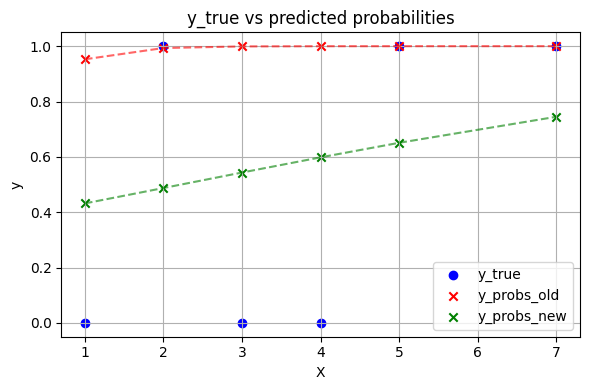

In [40]:
# Assuming X is 1D
sorted_idx = np.argsort(X.flatten())  # Get sorted indices for smooth line

# Sort values for clean line plotting
X_sorted = X.flatten()[sorted_idx]
y_probs_old_sorted = y_probs_old[sorted_idx]
y_probs_new_sorted = y_probs_new[sorted_idx]

plt.figure(figsize=(6,4))
plt.scatter(X, Y, marker='o', color='blue', label='y_true')
plt.scatter(X, y_probs_old, marker='x', color='red', label='y_probs_old')
plt.scatter(X, y_probs_new, marker='x', color='green', label='y_probs_new')

# Plot smooth prediction lines
plt.plot(X_sorted, y_probs_old_sorted, color='red', linestyle='--', alpha=0.6)
plt.plot(X_sorted, y_probs_new_sorted, color='green', linestyle='--', alpha=0.6)

plt.legend()
plt.title("y_true vs predicted probabilities")
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# we can also make it for multiple features, but we need to change the code a bit
# for example, we can use the same code for multiple features, but we need to change

# the way we calculate the cost and gradient, and we need to use matrix operations instead of loops
# we can also use the same code for multiple features, but we need to change the way

# we calculate the cost and gradient, and we need to use matrix operations instead of loops

